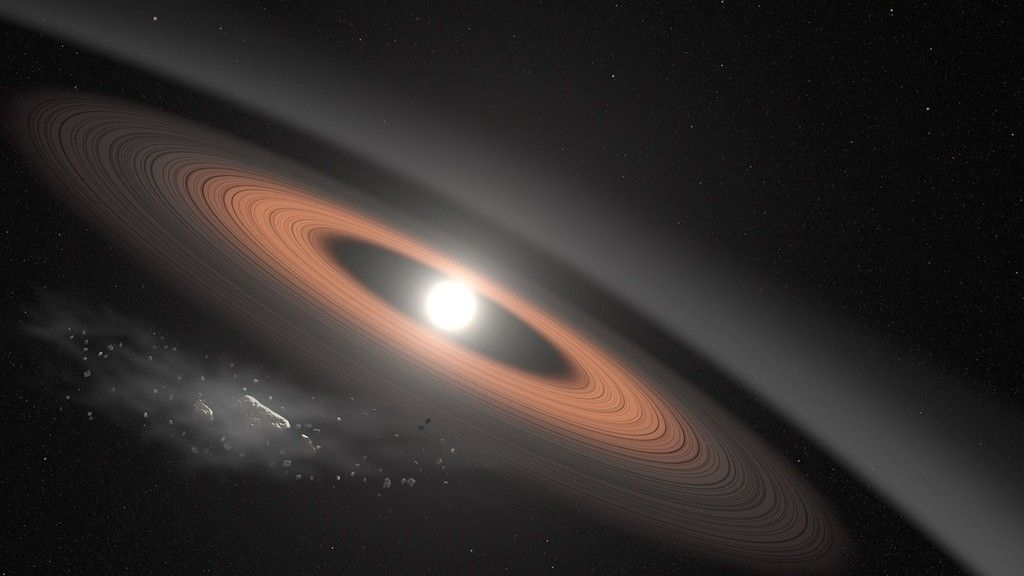

# project title : stars classification using stacking

### 🌟 Introduction

Stars are massive celestial bodies composed mainly of hydrogen and helium. Their classification helps astronomers understand their properties, life cycle, and how they evolve over time. 

#### ⭐ Why Classify Stars?  
Stars vary in size, temperature, and brightness. Understanding their classification allows scientists to:
- Predict stellar evolution (how a star changes over time)
- Identify habitable exoplanets (stars influence planetary conditions)
- Improve our knowledge of the universe's structure  

#### 🎯 Goal of this Notebook  
In this notebook, we will use **stacking (ensemble learning)** to classify stars into different categories based on their physical and spectral properties. We will:
- Explore and visualize the dataset 📊  
- Preprocess and prepare the data 🔄  
- Train multiple models (Decision Tree, Random Forest, SVM) 🤖  
- Use stacking to improve classification accuracy 🚀  


## ⭐ Star Classification Process  

### 🔭 How Do Astronomers Classify Stars?  
Stars are classified based on their **spectral characteristics, temperature, and luminosity**. The most common classification system is the **Morgan-Keenan (MK) system**, which organizes stars into spectral types:  

###  Spectral Classification (O, B, A, F, G, K, M)  
Stars are divided into seven main spectral types based on their surface temperature and color:  

| Spectral Type | Temperature (K) | Color      | Examples       |
|--------------|----------------|------------|---------------|
| O           | > 30,000 K      | Blue       | Rare, massive |
| B           | 10,000 - 30,000 | Blue-White | Rigel, Spica  |
| A           | 7,500 - 10,000  | White      | Sirius, Vega  |
| F           | 6,000 - 7,500   | Yellow-White | Procyon       |
| G           | 5,200 - 6,000   | Yellow     | Sun, Alpha Centauri A |
| K           | 3,700 - 5,200   | Orange     | Arcturus      |
| M           | < 3,700         | Red        | Betelgeuse, Proxima Centauri |

**🔥 Fun Fact:** The Sun is a **G-type** star!  

### 🌟 The Hertzsprung-Russell (H-R) Diagram  
The **H-R diagram** is a famous tool that helps astronomers classify stars based on:  
1. **Luminosity** (brightness)  
2. **Temperature** (color/spectral type)  
3. **Size** (radius)  

🔹 **Main Sequence Stars** – The most common stars, like the Sun  
🔹 **Giants & Supergiants** – Bright, massive stars near the end of their life  
🔹 **White Dwarfs** – Small, hot stars that are the remains of dead stars  


### 🔬 What Features Are Used for Star Classification?  
To classify stars, we use **features** that describe their physical properties:  
- **Temperature** 🌡️: Surface temperature of the star in Kelvin  
- **Luminosity** 💡: The brightness of the star  
- **Radius** 🌍: The size of the star compared to the Sun  
- **Absolute Magnitude** 🔦: The star’s brightness if it were at a standard distance  
- **Spectral Type** : The color and chemical composition of the star  

### 🔥 How Machine Learning Helps in Star Classification  
Traditional classification methods involve **spectroscopy**, which requires large telescopes and complex calculations. With **Machine Learning**, we can automate this process by training models to predict the **type of star** based on available data.  

In this project, we will use:  
✅ **Stacking (Ensemble Learning)** to combine multiple models for higher accuracy  
✅ **Decision Tree, Random Forest, and SVM** as base classifiers  
✅ **A meta-classifier** to make the final star classification  

📌 **Next Step:** Let's explore the dataset! 🚀  


# 1-exploring the data set 

- the first step before exploring the data set , is implementing the needed libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#upload the data set 
data = pd.read_csv("6 class csv.csv")

data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


- now that we uploaded the data set we need to know and get the general information about the dataset , from shape , number of rows and columns to general statistical overview ...

In [18]:
print("data types of columns : ")
print(data.dtypes)

data types of columns : 
Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object


In [3]:
print(f"dataset shape : {data.shape}")
print("_________________________________________________________________________")
print(f"number of rows : {data.shape[0]} , number of columns : {data.shape[1]}  ")
print("_________________________________________________________________________")
print(f"target columns names : {data.columns}")
print("_________________________________________________________________________")

dataset shape : (240, 7)
_________________________________________________________________________
number of rows : 240 , number of columns : 7  
_________________________________________________________________________
target columns names : Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')
_________________________________________________________________________


In [4]:
print(f"overview of data set {data.info()}")
print("_________________________________________________________________________")
print(f"overview of data set {data.describe()}")
print("_________________________________________________________________________")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB
overview of data set None
_________________________________________________________________________
overview of data set        Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count       240.000000        240.000000    240.000000   
mean      10497.462500     107188.361635    237.157781   
std        9552.425037     179432.244940    517.155763   
min

- checking for missing values :

In [5]:
print("checking for missing values : ")
print(data.isnull().sum())

checking for missing values : 
Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64


- checking for duplicates : 

In [6]:
print("checking for duplicates : ")
print(data.duplicated().sum())

checking for duplicates : 
0


- target feature : 

In [16]:
print(f"target class values : {data["Spectral Class"].unique()}")
print("_________________________________________________________________________")
print(f"ditribution of each class value :\n{data["Spectral Class"].value_counts()}")



target class values : ['M' 'B' 'A' 'F' 'O' 'K' 'G']
_________________________________________________________________________
ditribution of each class value :
Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64


# 2-exploratory data analysis (EDA)

- checking the balance of the target class => target variable disrtibution

C:\Users\ACER 2022\AppData\Local\Temp\ipykernel_12388\3538426723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Spectral Class"] , palette="coolwarm")


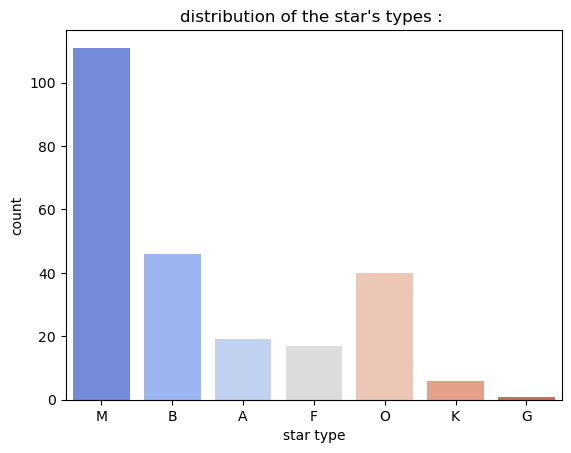

In [8]:
plt.Figure(figsize=(8,5))
sns.countplot(x=data["Spectral Class"] , palette="coolwarm")
plt.title("distribution of the star's types : ")
plt.xlabel("star type")
plt.ylabel("count")
plt.show()


- checking the distribution of the features : 

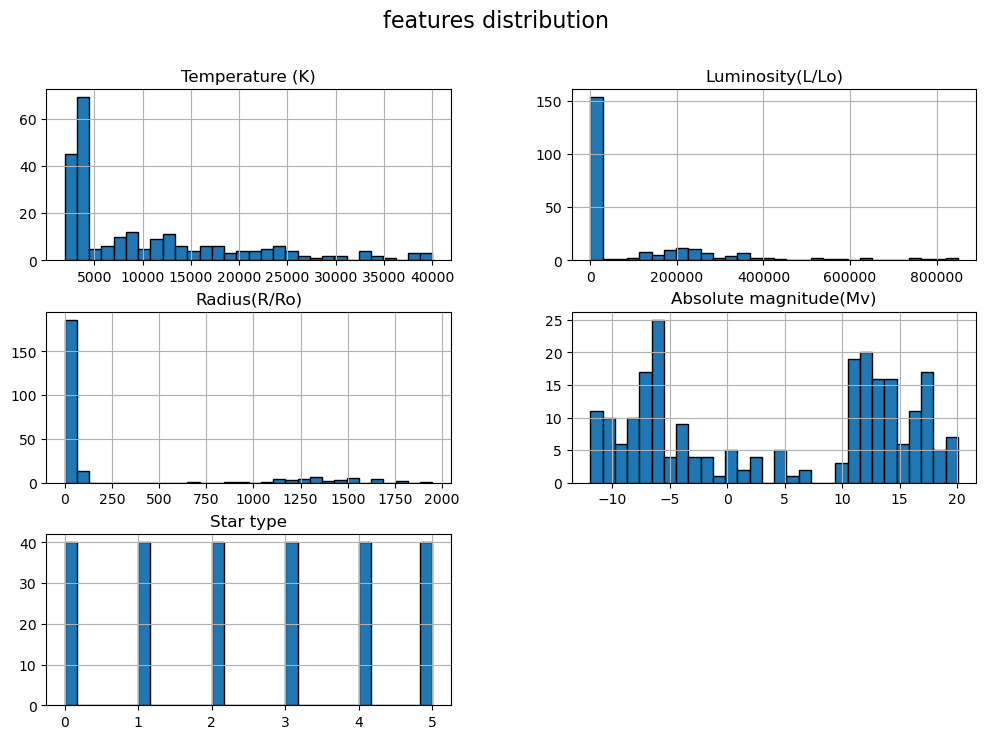

In [10]:
data.hist(figsize=(12,8) , bins=30 , edgecolor="black")
plt.suptitle("features distribution" , fontsize=16)
plt.show()

- we want to check if there are some features taht are related to the target variable : 

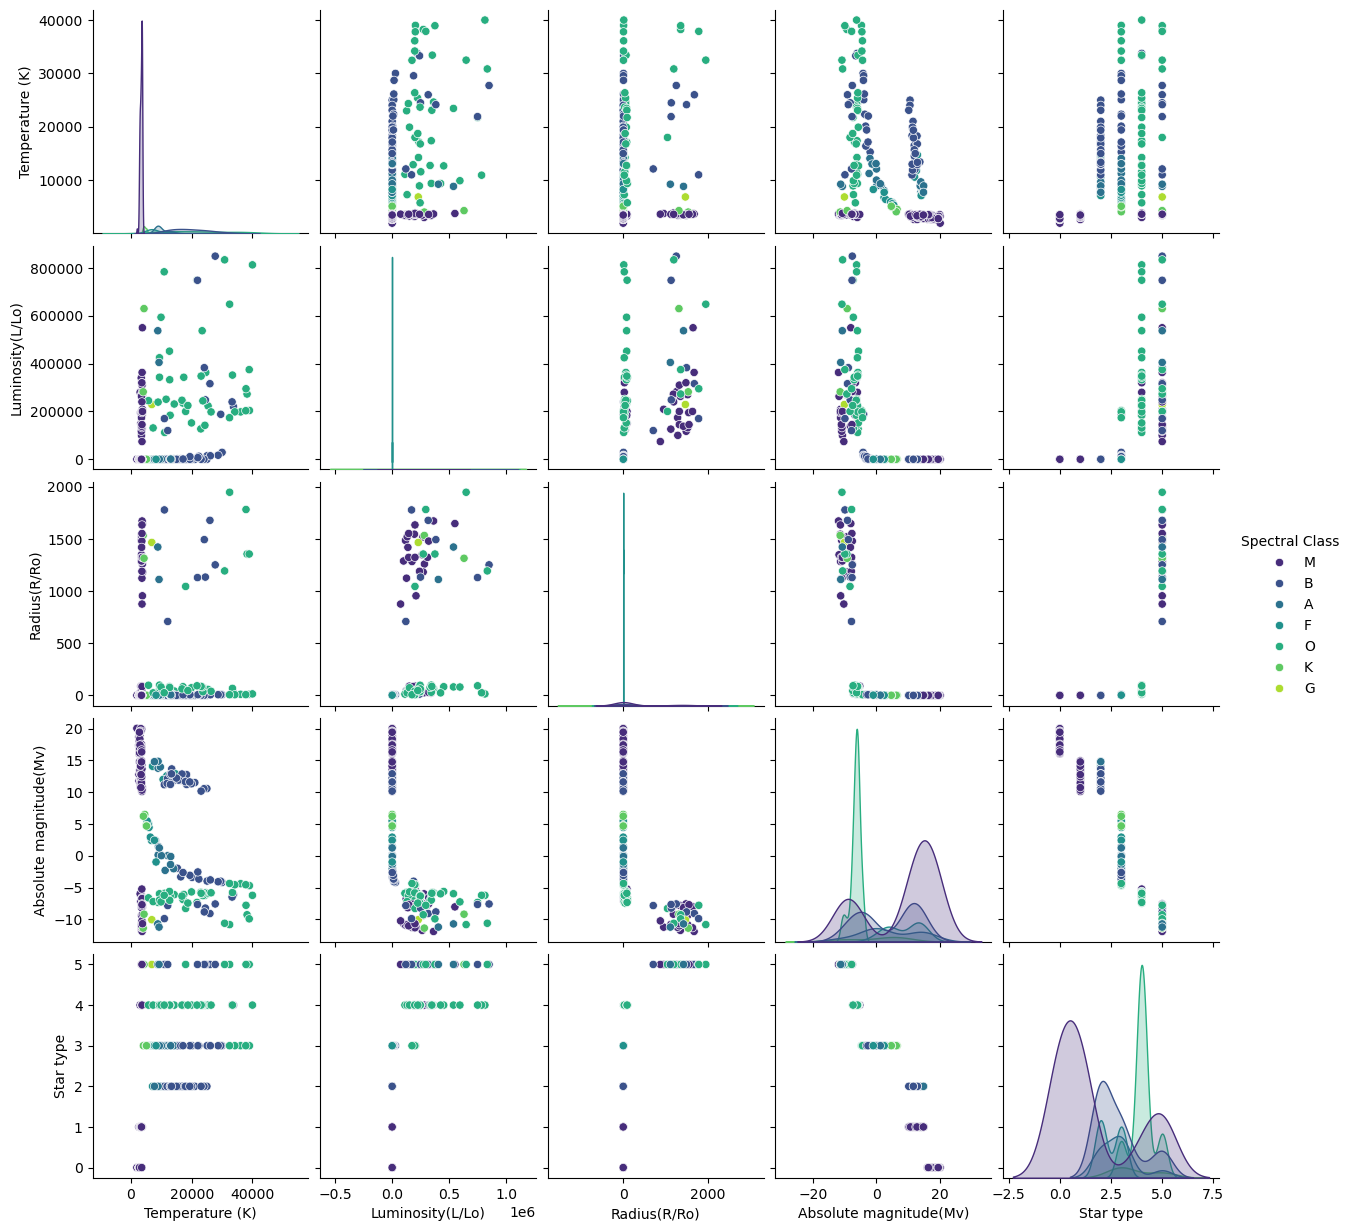

In [11]:
sns.pairplot(data , hue="Spectral Class" , palette="viridis")
plt.show()

- we want to know if there are any outliers : 

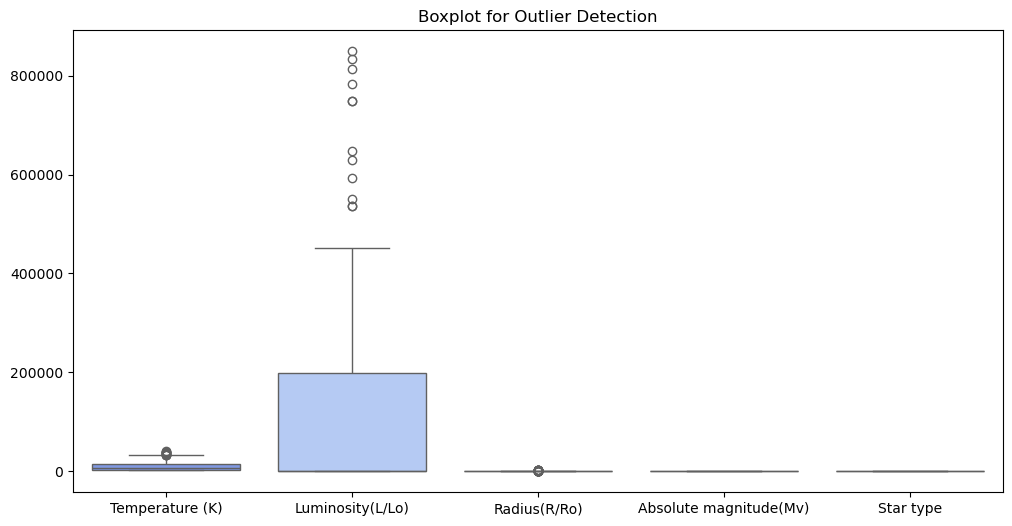

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, palette="coolwarm")
plt.title("Boxplot for Outlier Detection")
plt.show()

# 3-data preprocessing

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

- scaling for numerical features and encoding for categorical features :

In [35]:
num_features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
cat_features = ['Star color']
target = 'Spectral Class'

scaler = StandardScaler()
data[num_features]=scaler.fit_transform(data[num_features])

encoder = LabelEncoder()
data['Star color'] = encoder.fit_transform(data['Star color'])

target_encoder = LabelEncoder()
data[target] = target_encoder.fit_transform(data[target])


# 4-classification with  stacking :

In [39]:
x = data.drop(columns=["Spectral Class"])
y=data["Spectral Class"]

In [40]:
print(x.head())
print("_________________________________________")
print(y.head())

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0        -0.779382         -0.598624     -0.459210                1.116745   
1        -0.782110         -0.598624     -0.459241                1.162414   
2        -0.828477         -0.598624     -0.459342                1.362213   
3        -0.807496         -0.598624     -0.459229                1.167171   
4        -0.897819         -0.598624     -0.459340                1.491607   

   Star type  Star color  
0          0          10  
1          0          10  
2          0          10  
3          0          10  
4          0          10  
_________________________________________
0    5
1    5
2    5
3    5
4    5
Name: Spectral Class, dtype: int64


- splitting the data set to validate , test and train 

In [120]:
from sklearn.model_selection import train_test_split

x_temp , x_test , y_temp , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

x_train , x_valid , y_train , y_valid = train_test_split(x_temp , y_temp , test_size=0.2 , random_state=42)



- now we create the base models , decision tree , random forest and support vector machine classifiers 

In [69]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier( )
decision_tree.fit(x_train , y_train)

y_pred1=decision_tree.predict(x_valid)

In [103]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42 , n_estimators=20 )
random_forest.fit(x_train , y_train)
y_pred2= random_forest.predict(x_valid)

In [71]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf' , random_state=42  )
svm.fit(x_train , y_train)

y_pred3=svm.predict(x_valid)

- now , the meta model :

In [104]:
print(f"The shape of decision tree predictions array is {y_pred1.shape}")
print("____________________________________________________________________________")
print(f"The shape of decision random forest predictions array is {y_pred2.shape}")
print("_____________________________________________________________________________")
print(f"The shape of decision svm predictions array is {y_pred3.shape}")

The shape of decision tree predictions array is (39,)
____________________________________________________________________________
The shape of decision random forest predictions array is (39,)
_____________________________________________________________________________
The shape of decision svm predictions array is (39,)


In [105]:
meta_data = np.concatenate(
    (
      y_pred1.reshape(-1,1), 
      y_pred2.reshape(-1,1), 
      y_pred3.reshape(-1,1),   
    ),
    axis=1
)

In [106]:
meta_data

array([[5, 5, 5],
       [5, 5, 5],
       [1, 4, 5],
       [6, 6, 6],
       [5, 5, 5],
       [1, 1, 1],
       [5, 5, 5],
       [6, 6, 6],
       [1, 1, 6],
       [0, 0, 2],
       [5, 5, 5],
       [6, 6, 6],
       [6, 6, 6],
       [1, 1, 1],
       [0, 0, 1],
       [6, 6, 6],
       [5, 5, 5],
       [6, 6, 6],
       [0, 0, 1],
       [1, 0, 1],
       [1, 1, 1],
       [1, 6, 6],
       [5, 5, 5],
       [1, 1, 1],
       [2, 2, 2],
       [5, 5, 1],
       [2, 2, 5],
       [0, 2, 5],
       [5, 5, 5],
       [5, 5, 5],
       [6, 6, 6],
       [2, 2, 2],
       [1, 1, 1],
       [5, 5, 5],
       [5, 5, 5],
       [5, 5, 5],
       [5, 5, 5],
       [5, 5, 5],
       [5, 5, 5]], dtype=int64)

In [107]:
#converting the meta_data to a pandas data frame
meta_data=pd.DataFrame(meta_data)
meta_data.head()

,0,1,2
0,5,5,5
1,5,5,5
2,1,4,5
3,6,6,6
4,5,5,5


- now we create the meta model , after the meta data that is successfuly created 

In [108]:
meta_model = RandomForestClassifier(random_state=42 , n_estimators=10)
meta_model.fit(meta_data , y_valid)

RandomForestClassifier(n_estimators=10, random_state=42)

In [109]:
def stacking(models, X_test):
    results = []
    for model in models:
        y_pred = model.predict(X_test).reshape(-1,1)

        results.append(y_pred)

    stacked_df = pd.DataFrame(np.concatenate(results , axis=1))
                
    return stacked_df

In [110]:
models = [decision_tree , random_forest , svm]

data_2 =stacking(models , x_test)

data_2.head()

,0,1,2
0,1,1,1
1,5,5,5
2,2,2,2
3,6,6,6
4,0,6,6


In [111]:
y_pred =meta_model.predict(data_2)

- now that the model is done , we need to test and see the accuracy of our model : 

In [112]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test , y_pred)

print(f"the accuracy of the model is : {accuracy}")

the accuracy of the model is : 0.9375


In [118]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 1  0  0  0  1  0]
 [ 0 10  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.91      1.00      0.95        10
           2       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         3
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        10

    accuracy                           0.92        48
   macro avg       0.73      0.75      0.71        48
weighted avg       0.88      0.92      0.89        48



c:\Users\ACER 2022\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER 2022\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER 2022\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r